In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fooddetection/Food pics for PE project/Apple/apple.jpg
/kaggle/input/fooddetection/Food pics for PE project/Apple/apple(2).jpg
/kaggle/input/fooddetection/Food pics for PE project/Apple/apple(1).jpg
/kaggle/input/fooddetection/Food pics for PE project/Burger/Burger(4).jpg
/kaggle/input/fooddetection/Food pics for PE project/Burger/Burger(1).jpg
/kaggle/input/fooddetection/Food pics for PE project/Burger/Burger(3).jpg
/kaggle/input/fooddetection/Food pics for PE project/Burger/Burger(2).jpg
/kaggle/input/fooddetection/Food pics for PE project/Burger/Burger.jpg
/kaggle/input/fooddetection/Food pics for PE project/Coffee/Coffee(4).jpg
/kaggle/input/fooddetection/Food pics for PE project/Coffee/Coffee(2).jpg
/kaggle/input/fooddetection/Food pics for PE project/Coffee/Coffee(1).jpg
/kaggle/input/fooddetection/Food pics for PE project/Coffee/Coffee(3).jpg
/kaggle/input/fooddetection/Food pics for PE project/Coffee/Coffee.jpg
/kaggle/input/fooddetection/Food pics for PE project/

In [2]:
pip install tensorflow matplotlib


Note: you may need to restart the kernel to use updated packages.


2025-04-17 17:29:23.381719: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744910963.641352      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744910963.715945      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 48 files belonging to 13 classes.
Using 39 files for training.
Found 48 files belonging to 13 classes.
Using 9 files for validation.
Detected classes: ['Apple', 'Banana', 'Burger', 'Coffee', 'Fries', 'Noodles', 'Onion', 'Peas', 'Pizza', 'Potato', 'Soft Drink', 'Tea', 'kiwi']


2025-04-17 17:29:39.564150: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


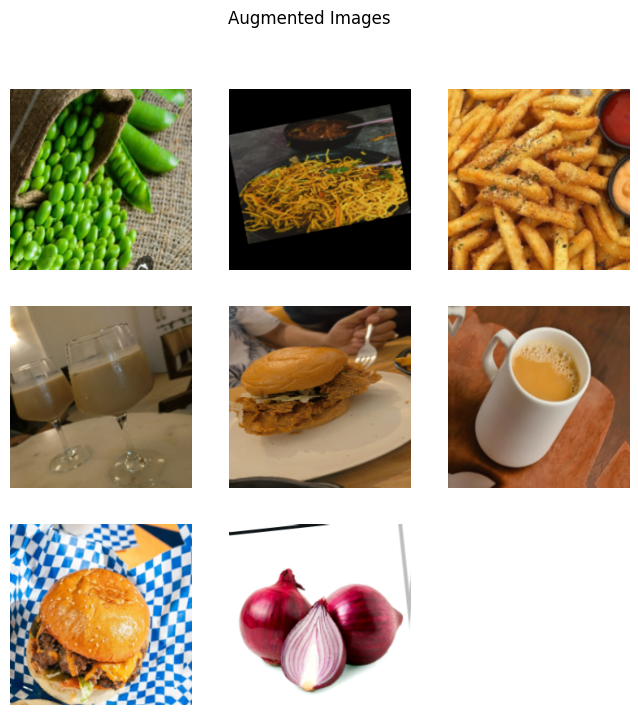

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Define image size and batch
img_size = (224, 224)
batch_size = 8

# Load and split dataset (80% train, 20% val)
train_ds = image_dataset_from_directory(
    "/kaggle/input/fooddetection/Food pics for PE project/",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    "/kaggle/input/fooddetection/Food pics for PE project/",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

class_names = train_ds.class_names
print("Detected classes:", class_names)

# Prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

# Visualize augmented samples
for images, _ in train_ds.take(1):
    plt.figure(figsize=(8, 8))
    num_images = min(9, images.shape[0])  # Prevent index out of range
    for i in range(num_images):
        augmented_image = data_augmentation(images)[i].numpy().astype("uint8")
        plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image)
        plt.axis("off")
    plt.suptitle("Augmented Images")
    plt.show()


In [4]:
import os
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

# Path to your original dataset
input_dir = '/kaggle/input/fooddetection/Food pics for PE project/'  # Replace with your actual folder path
output_dir = '/kaggle/working/fooddetection/Food pics for PE project/'  # Folder to save augmented images

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Augmentation configuration
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Loop over each class folder
for class_name in os.listdir(input_dir):
    class_path = os.path.join(input_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    output_class_path = os.path.join(output_dir, class_name)
    os.makedirs(output_class_path, exist_ok=True)

    # Loop over each image in the class folder
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        img = Image.open(img_path).convert('RGB')
        img = img.resize((224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)

        # Generate 10 augmented images
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=output_class_path,
                                  save_prefix=os.path.splitext(img_file)[0], save_format='jpg'):
            i += 1
            if i >= 10:
                break

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
from PIL import Image
from tensorflow.keras.preprocessing import image

# Path to your dataset
input_dir = '/kaggle/input/fooddetection/Food pics for PE project/'  # Replace with your actual folder path
output_dir = '/kaggle/working/augmented_food_data/'  # Folder to save augmented images

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Augmentation configuration
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Loop over each class folder to augment images
for class_name in os.listdir(input_dir):
    class_path = os.path.join(input_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    output_class_path = os.path.join(output_dir, class_name)
    os.makedirs(output_class_path, exist_ok=True)

    # Focus on augmenting underrepresented classes like 'Soft Drink'
    if class_name == 'Soft Drink' or class_name == 'Apple' or class_name == 'Banana':
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            img = Image.open(img_path).convert('RGB')
            img = img.resize((224, 224))  # Resize image to 224x224 as required by MobileNetV2
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)

            # Generate 10 augmented images for this class
            i = 0
            for batch in datagen.flow(x, batch_size=1, save_to_dir=output_class_path, 
                                      save_prefix=os.path.splitext(img_file)[0], save_format='jpg'):
                i += 1
                if i >= 10:  # Change this value to generate more or fewer images
                    break


In [6]:
import os
from shutil import move

# Create train and validation directories
base_dir = '/kaggle/working/augmented_food_data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Create class subdirectories for train and validation
classes = ['Apple', 'Banana', 'Burger', 'Coffee', 'Fries', 'Noodles', 'Onion', 'Peas', 'Pizza', 'Potato', 'Soft Drink', 'Tea', 'kiwi']
for class_name in classes:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(validation_dir, class_name), exist_ok=True)

# Move the images into the appropriate subdirectories
# You can use a simple move function or manually manage the dataset


In [7]:
import os
import shutil
import random

# Paths to the folders where augmented images are stored
augmented_data_dir = '/kaggle/working/fooddetection/Food pics for PE project/'  # Replace with your augmented dataset path
train_dir = '/kaggle/working/augmented_food_data/train'
validation_dir = '/kaggle/working/augmented_food_data/validation'

# List of class names
classes = ['Apple', 'Banana', 'Burger', 'Coffee', 'Fries', 'Noodles', 'Onion', 'Peas', 'Pizza', 'Potato', 'Soft Drink', 'Tea', 'kiwi']

# Function to move files to train and validation directories
def move_files(class_name):
    class_dir = os.path.join(augmented_data_dir, class_name)
    if os.path.exists(class_dir):
        # List all files in the class directory
        all_files = os.listdir(class_dir)
        random.shuffle(all_files)

        # Split into training (80%) and validation (20%)
        split_index = int(0.8 * len(all_files))

        # Create subdirectories in train and validation
        train_class_dir = os.path.join(train_dir, class_name)
        validation_class_dir = os.path.join(validation_dir, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(validation_class_dir, exist_ok=True)

        # Move files to train
        for file in all_files[:split_index]:
            shutil.move(os.path.join(class_dir, file), os.path.join(train_class_dir, file))

        # Move files to validation
        for file in all_files[split_index:]:
            shutil.move(os.path.join(class_dir, file), os.path.join(validation_class_dir, file))

# Move images for each class
for class_name in classes:
    move_files(class_name)

print("Files have been moved to train and validation folders.")


Files have been moved to train and validation folders.


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
import tensorflow as tf

# Set the paths to the train and validation directories
train_dir = '/kaggle/working/augmented_food_data/train'
validation_dir = '/kaggle/working/augmented_food_data/validation'

# Set up the ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize the image pixels to [0, 1]
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for validation

# Load the training and validation data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize images to 224x224 (required for MobileNetV2)
    batch_size=32,
    class_mode='categorical'  # For multi-class classification
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),  # Resize images to 224x224 (required for MobileNetV2)
    batch_size=32,
    class_mode='categorical'  # For multi-class classification
)

# Set up the MobileNetV2 model without the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of MobileNetV2 to avoid retraining them
base_model.trainable = False

# Add a custom classifier on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer for regularization
    layers.Dense(13, activation='softmax')  # 13 classes for food detection
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # You can adjust the number of epochs based on your dataset size
    validation_data=validation_generator
)

# Save the trained model
model.save('/kaggle/working/food_detection_model.h5')

print("Model training complete.")


Found 384 images belonging to 13 classes.
Found 96 images belonging to 13 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.4655 - loss: 1.7343 - val_accuracy: 1.0000 - val_loss: 0.0426
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9715 - loss: 0.0907 - val_accuracy: 1.0000 - val_loss: 0.0041
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 1.0000 - loss: 0.0115 - val_accuracy: 1.0000 - val_loss: 0.0075
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9989 - loss: 0.0159 - val_accuracy: 1.0000 - val_loss: 8.0114e-04
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9978 - loss: 0.0115 - val_accuracy: 1.0000 - val_loss: 3.5101e-04
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9986 - loss: 0.0051 - val_accuracy: 1.0000 - val_loss: 1.0560e-04
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9994 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 1.4026e-04
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9923 - loss: 0.0062 - val_accuracy: 1.0000 - val_

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


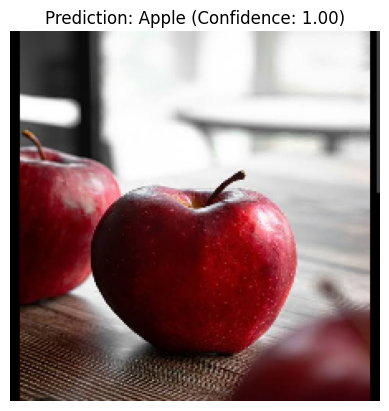

Predicted class: Apple (Confidence: 1.00)


In [9]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Path to the image you want to predict
img_path = '/kaggle/input/fooddetection/Food pics for PE project/Apple/apple.jpg'  # Change this to your test image path

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))  # Resize the image to 224x224
img_array = image.img_to_array(img)  # Convert the image to an array
img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)  # Preprocess the image
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the batch size (1, 224, 224, 3)

# Load the saved model
model = tf.keras.models.load_model('/kaggle/working/food_detection_model.h5')

# Make a prediction
predictions = model.predict(img_array)

# Get the predicted class index and the confidence (probability)
predicted_index = np.argmax(predictions)
confidence = np.max(predictions)

# Get the predicted class name
class_names = ['Apple', 'Banana', 'Burger', 'Coffee', 'Fries', 'Noodles', 'Onion', 'Peas', 'Pizza', 'Potato', 'Soft Drink', 'Tea', 'kiwi']
predicted_class = class_names[predicted_index]

# Show the image and prediction
plt.imshow(img)
plt.title(f"Prediction: {predicted_class} (Confidence: {confidence:.2f})")
plt.axis('off')
plt.show()

# Output the result
print(f"Predicted class: {predicted_class} (Confidence: {confidence:.2f})")


In [10]:
import shutil

# Compress the model file into a zip
shutil.make_archive('food_detection_model', 'zip', '.', 'food_detection_model.h5')


'/kaggle/working/food_detection_model.zip'